In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pydbm.cnn.convolutionalneuralnetwork.convolutional_auto_encoder import ConvolutionalAutoEncoder
from pydbm.cnn.convolutionalneuralnetwork.convolutionalautoencoder.convolutional_ladder_networks import ConvolutionalLadderNetworks

from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
from pydbm.cnn.layerablecnn.max_pooling_layer import MaxPoolingLayer

from pydbm.cnn.featuregenerator.image_generator import ImageGenerator
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph3


from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.loss.kl_divergence import KLDivergence
from pydbm.optimization.optparams.adam import Adam
from pydbm.activation.softmax_function import SoftmaxFunction
from pydbm.synapse.nn_graph import NNGraph as EncoderGraph
from pydbm.synapse.nn_graph import NNGraph as DecoderGraph
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation
from pydbm.optimization.batch_norm import BatchNorm
from pydbm.optimization.optparams.rms_prop import RMSProp

from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [2]:
from pydbm.cnn.featuregenerator.label_image_generator import LabelImageGenerator
channel = 1
epochs = 100

height = 28
width = 28
scale = 0.01
feature_generator = LabelImageGenerator(
    epochs=1000,
    batch_size=500,
    training_image_dir="../../../../Downloads/trainingSample/trainingSample///",
    test_image_dir="../../../../Downloads/trainingSample/trainingSample///",
    seq_len=None,
    gray_scale_flag=True,
    wh_size_tuple=(width, height),
    norm_mode="min_max"
)

In [3]:
batch_size = 20
dim1 = channel * width * height
dim2 = 100
scale = 1e-05

In [4]:
from pydbm.optimization.batch_norm import BatchNorm

activation_function=LogisticFunction()
#activation_function.batch_norm = BatchNorm()

conv1 = ConvolutionLayer1(
    ConvGraph1(
        activation_function=activation_function,
        filter_num=batch_size,
        channel=channel,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

activation_function=LogisticFunction()
#activation_function.batch_norm = BatchNorm()

conv3 = ConvolutionLayer2(
    ConvGraph3(
        activation_function=activation_function,
        filter_num=batch_size,
        channel=batch_size,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)


opt_params = Adam()
#opt_params.weight_decay_lambda = 0.1

cnn = ConvolutionalLadderNetworks(
    layerable_cnn_list=[
        conv1, 
        #conv2,
        conv3,
        #conv4
    ],
    epochs=100,
    batch_size=batch_size,
    learning_rate=0.1,
    learning_attenuate_rate=0.1,
    attenuate_epoch=25,
    computable_loss=MeanSquaredError(),
    #computable_loss=KLDivergence(),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=0.0,
    save_flag=False,
    output_no_bias_flag=True
)

Setup CNN layers and the parameters.
Setup Convolutional Auto-Encoder and the parameters.


In [5]:
"""normal_arr = np.random.uniform(low=-1.0, high=0.0, size=(1000, dim1))
uniform_arr = np.random.uniform(low=0.0, high=1.0, size=(1000, dim1))
observed_arr = np.r_[normal_arr, uniform_arr]
observed_arr = (observed_arr - observed_arr.min()) / (observed_arr.max() - observed_arr.min())
normal_arr = observed_arr[:normal_arr.shape[0]]
uniform_arr = observed_arr[normal_arr.shape[0]:]"""

for data, _data, _, _ in feature_generator.generate():
    observed_arr = data
    label_arr = _data
    break

In [6]:
#observed_arr = observed_arr.reshape((observed_arr.shape[0], -1))
#observed_arr = observed_arr.astype(np.float)
#label_arr = label_arr.reshape((label_arr.shape[0], -1))
#observed_arr = observed_arr / (height * width * channel)
label_arr = label_arr.astype(np.float)

In [7]:
observed_arr.shape, label_arr.shape

((500, 1, 28, 28), (500, 10))

In [8]:
cnn.learn(observed_arr)

CNN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 1.3141720812904647 Test: 1.764713333515205
----------------------------------------------------------------------------------------------------
Train alpha: 0.48742442304510597 Test alpha: 0.5593014572645145
Train sigma: 0.4853015972155498 Test sigma: 0.8415991704920195
Train mu: 0.1685739353911123 Test mu: 0.3029520228201342
----------------------------------------------------------------------------------------------------
Epoch: 2
Loss: 
Training: 1.7920824829907915 Test: 1.5161182431748497
----------------------------------------------------------------------------------------------------
Train alpha: 0.548421555682102 Test alpha: 0.5085457065703018
Train sigma: 0.8598504115876096 Test sigma: 0.6936841047894812
Train mu: 0.30907977556748983 Test mu: 0.24791882581936633
----------------------------------------------------------------------------------------------------
Epoch: 3
Loss: 
Training: 1.564525937642716

Train sigma: 0.68196661671627 Test sigma: 0.5499485710796782
Train mu: 0.2568200293484631 Test mu: 0.21319404917344822
----------------------------------------------------------------------------------------------------
Epoch: 18
Loss: 
Training: 1.374111527542547 Test: 1.0654874791750402
Rolling mean of Loss (Window is 10): 
Training: 1.6636830892162382 Test: 1.6176291589384284
----------------------------------------------------------------------------------------------------
Train alpha: 0.5123324296987378 Test alpha: 0.4939752003924926
Train sigma: 0.5682483092541508 Test sigma: 0.40081584551649485
Train mu: 0.2181929000970313 Test mu: 0.13122479824040537
----------------------------------------------------------------------------------------------------
Epoch: 19
Loss: 
Training: 1.1099732324556866 Test: 1.1712141104557277
Rolling mean of Loss (Window is 10): 
Training: 1.6301194490020237 Test: 1.554209197261682
---------------------------------------------------------------------

Train sigma: 0.3708297291795394 Test sigma: 0.36016220924741443
Train mu: 0.1761221802843995 Test mu: 0.16055583400031312
----------------------------------------------------------------------------------------------------
Epoch: 33
Loss: 
Training: 1.3393265359414035 Test: 1.222787602448851
Rolling mean of Loss (Window is 10): 
Training: 1.1642522945713432 Test: 1.197384483996745
----------------------------------------------------------------------------------------------------
Train alpha: 0.48676898920893324 Test alpha: 0.4858814050294293
Train sigma: 0.36984677931063753 Test sigma: 0.3520454643990386
Train mu: 0.1704274100981402 Test mu: 0.15293686016603536
----------------------------------------------------------------------------------------------------
Epoch: 34
Loss: 
Training: 1.286921450362979 Test: 1.1945695276540023
Rolling mean of Loss (Window is 10): 
Training: 1.228824374631208 Test: 1.2492715877098601
-------------------------------------------------------------------

Train sigma: 0.3699691999971652 Test sigma: 0.3669093927339078
Train mu: 0.14244493638512462 Test mu: 0.131284008929506
----------------------------------------------------------------------------------------------------
Epoch: 48
Loss: 
Training: 1.1415571794789297 Test: 1.0851712200078698
Rolling mean of Loss (Window is 10): 
Training: 1.200612682580237 Test: 1.1375839215949455
----------------------------------------------------------------------------------------------------
Train alpha: 0.48481440249366325 Test alpha: 0.48364626514318226
Train sigma: 0.3878242445042361 Test sigma: 0.36297485173054694
Train mu: 0.1458186917172463 Test mu: 0.12982271771159445
----------------------------------------------------------------------------------------------------
Epoch: 49
Loss: 
Training: 1.1089634557998274 Test: 1.1059574384100528
Rolling mean of Loss (Window is 10): 
Training: 1.18615663053747 Test: 1.1331791712254395
-------------------------------------------------------------------

Train alpha: 0.48771629037167386 Test alpha: 0.48707757556111875
Train sigma: 0.38547777075698075 Test sigma: 0.38200967629261084
Train mu: 0.1328745495049921 Test mu: 0.12912465162394499
----------------------------------------------------------------------------------------------------
Epoch: 63
Loss: 
Training: 1.1215498963457808 Test: 1.1108000917451377
Rolling mean of Loss (Window is 10): 
Training: 1.1170989544385517 Test: 1.106854842474193
----------------------------------------------------------------------------------------------------
Train alpha: 0.48680433663679235 Test alpha: 0.48774988424870286
Train sigma: 0.38807189280930665 Test sigma: 0.38335473336813974
Train mu: 0.13340070551583544 Test mu: 0.12935007250556488
----------------------------------------------------------------------------------------------------
Epoch: 64
Loss: 
Training: 1.11581490234695 Test: 1.112420817087677
Rolling mean of Loss (Window is 10): 
Training: 1.1171517952415306 Test: 1.108070253862104

Train alpha: 0.4852241114524301 Test alpha: 0.48567571358881984
Train sigma: 0.3938465699551087 Test sigma: 0.37836895093314615
Train mu: 0.13500668164048074 Test mu: 0.12854101246761349
----------------------------------------------------------------------------------------------------
Epoch: 78
Loss: 
Training: 1.1112528310226293 Test: 1.104379899500077
Rolling mean of Loss (Window is 10): 
Training: 1.1348159156356512 Test: 1.1145059584047174
----------------------------------------------------------------------------------------------------
Train alpha: 0.48652858454232706 Test alpha: 0.486729437620346
Train sigma: 0.38693864041315673 Test sigma: 0.38184338134663026
Train mu: 0.13112959734890298 Test mu: 0.12756192471042965
----------------------------------------------------------------------------------------------------
Epoch: 79
Loss: 
Training: 1.1392557635868985 Test: 1.1265475559912832
Rolling mean of Loss (Window is 10): 
Training: 1.1334817655080496 Test: 1.112684129263342

Train alpha: 0.4855883805994331 Test alpha: 0.4885232650598007
Train sigma: 0.38697606756581004 Test sigma: 0.37826868893069127
Train mu: 0.13348987113277302 Test mu: 0.12766966041855873
----------------------------------------------------------------------------------------------------
Epoch: 93
Loss: 
Training: 1.1445607558941513 Test: 1.104236051000798
Rolling mean of Loss (Window is 10): 
Training: 1.1331628529575961 Test: 1.1123148038956787
----------------------------------------------------------------------------------------------------
Train alpha: 0.48431163977771996 Test alpha: 0.4887113753463547
Train sigma: 0.4081059989247557 Test sigma: 0.3767519594083497
Train mu: 0.14105855395547304 Test mu: 0.1268896532253075
----------------------------------------------------------------------------------------------------
Epoch: 94
Loss: 
Training: 1.1431137075599944 Test: 1.0866831993051387
Rolling mean of Loss (Window is 10): 
Training: 1.1329308010889145 Test: 1.112008012050244
-

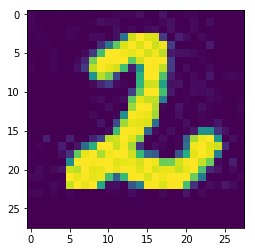

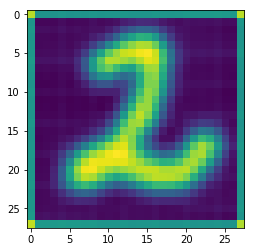

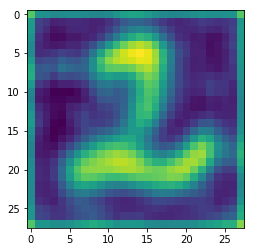

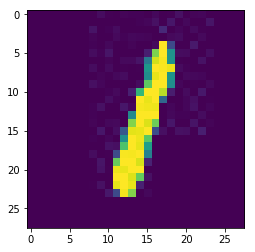

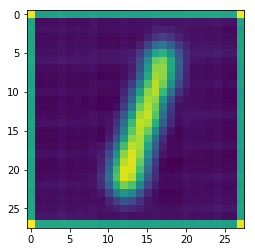

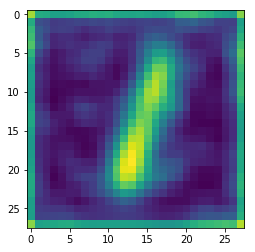

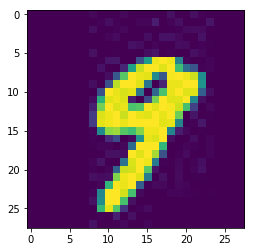

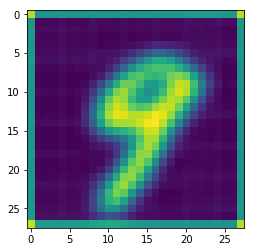

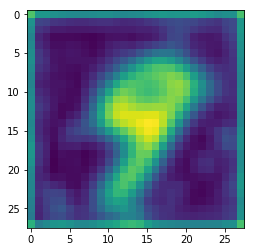

In [9]:
rec_arr = cnn.inference(observed_arr[:batch_size])
f_arr = cnn.extract_feature_points_arr()
for i in range(3):
    plt.imshow(observed_arr[i].mean(axis=0))
    plt.show()
    plt.imshow(f_arr[i].mean(axis=0))
    plt.show()
    plt.imshow(rec_arr[i].mean(axis=0))
    plt.show()

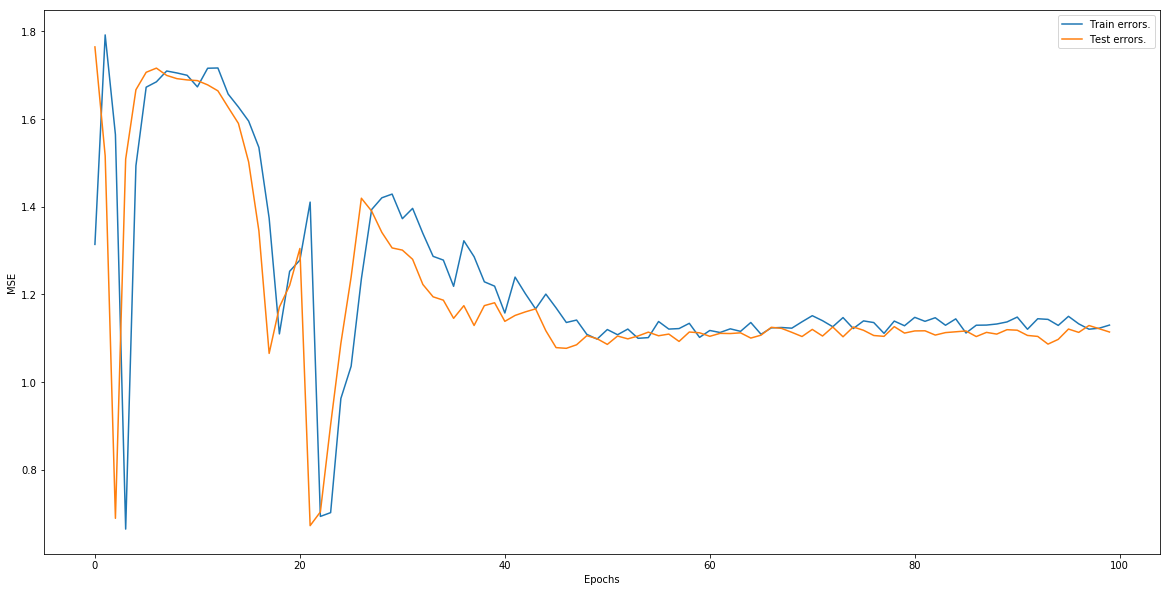

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(cnn.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(cnn.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()

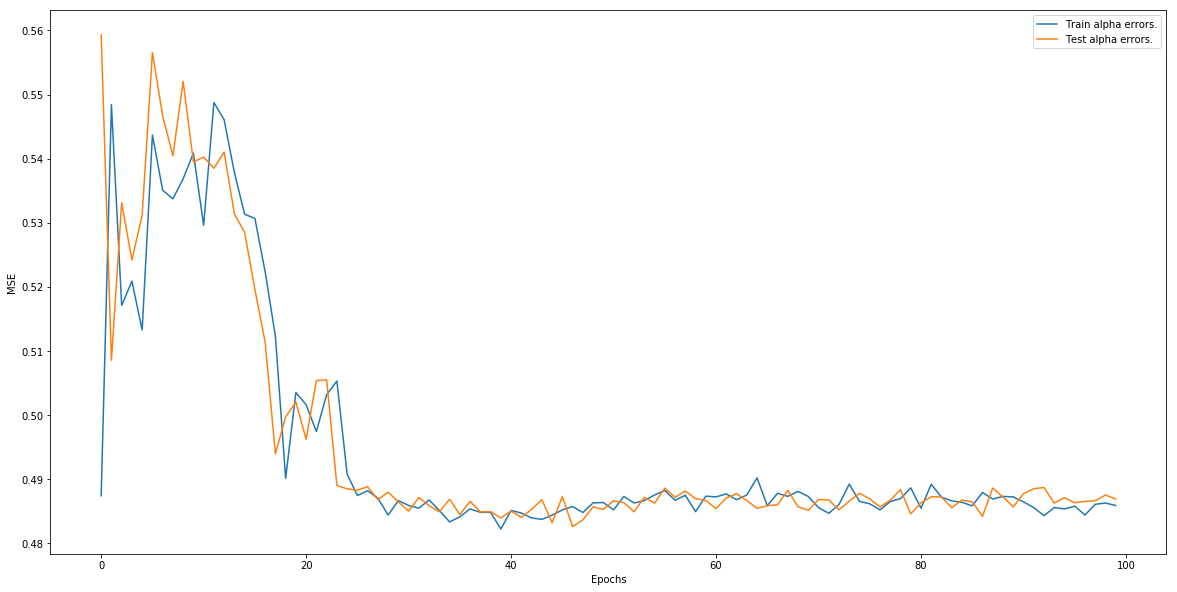

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(cnn.alpha_loss_arr[:, 0], label="Train alpha errors.")
plt.plot(cnn.alpha_loss_arr[:, 1], label="Test alpha errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()

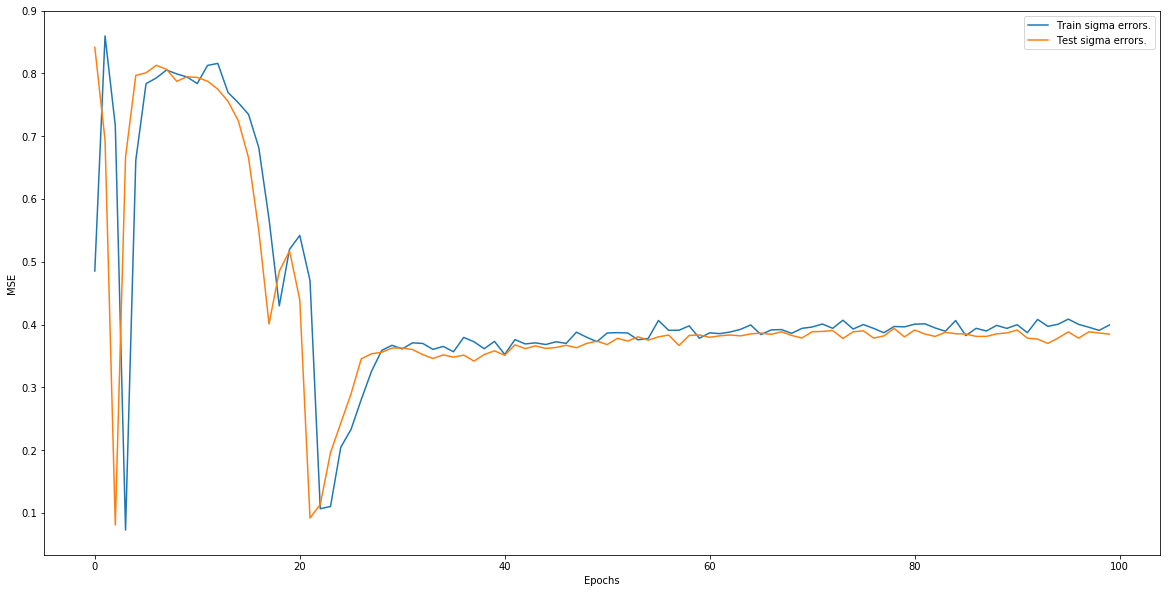

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(cnn.sigma_loss_arr[:, 0], label="Train sigma errors.")
plt.plot(cnn.sigma_loss_arr[:, 1], label="Test sigma errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()

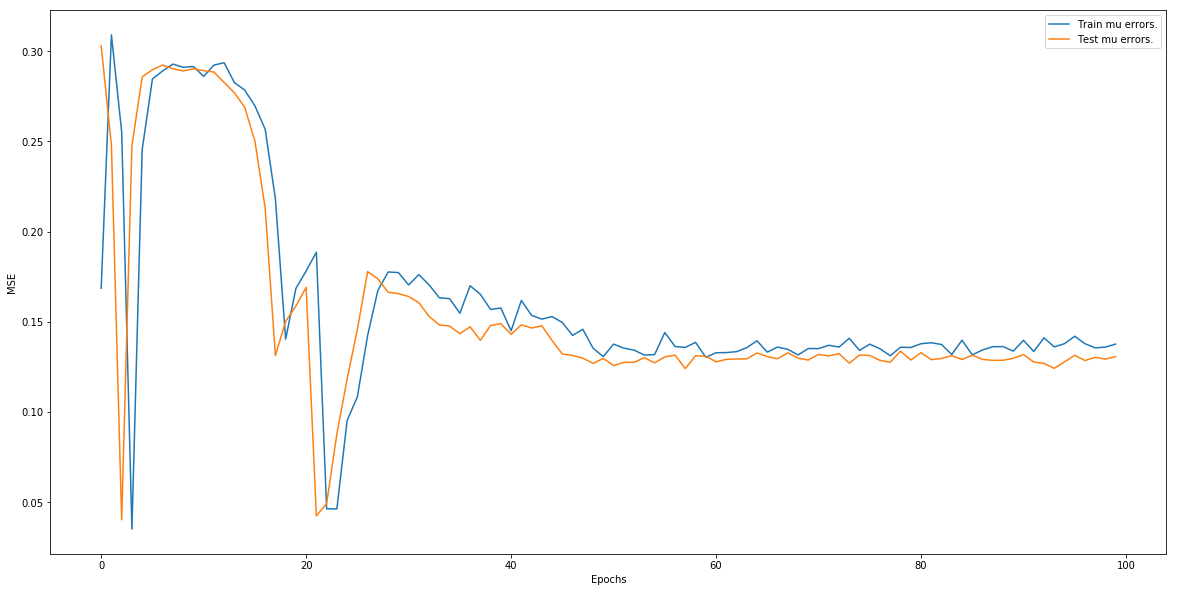

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(cnn.mu_loss_arr[:, 0], label="Train mu errors.")
plt.plot(cnn.mu_loss_arr[:, 1], label="Test mu errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()

In [14]:
#raise

In [15]:
from pydbm.semisupervised.autoencodable.convolutional_dec import ConvolutionalDEC

from pydbm.semisupervised.sklearn_kmeans import SklearnKMeans
from pydbm.semisupervised.deep_embedded_clustering import DeepEmbeddedClustering

from pydbm.semisupervised.interface.computable_clustering_loss import ComputableClusteringLoss
from pydbm.semisupervised.computableclusteringloss.balanced_assignments_loss import BalancedAssignmentsLoss
from pydbm.semisupervised.computableclusteringloss.k_means_loss import KMeansLoss
from pydbm.semisupervised.computableclusteringloss.reconstruction_loss import ReconstructionLoss
from pydbm.semisupervised.computableclusteringloss.repelling_loss import RepellingLoss
from pydbm.semisupervised.computableclusteringloss.repellingloss.improved_repelling_loss import ImprovedRepellingLoss

In [16]:
cnn_dec = ConvolutionalDEC()
cnn_dec.auto_encoder_model = cnn

opt_params_dec = Adam()
opt_params_dec.weight_limit = 1e+15
opt_params_dec.dropout_rate = 0.5


DEC = DeepEmbeddedClustering(
    cnn_dec,
    SklearnKMeans(),
    computable_clustering_loss_list=[
        #BalancedAssignmentsLoss(weight=1e-08),
        #KMeansLoss(weight=1e-08),
        ReconstructionLoss(weight=1.0), #, computable_loss=KLDivergence()),
        #ImprovedRepellingLoss(weight=0.33),
    ],
    opt_params=opt_params_dec,
    epochs=1000, 
    batch_size=batch_size, 
    learning_rate=1e-05, 
    learning_attenuate_rate=0.1,
    attenuate_epoch=100,
    tld=0.0, 
    tol=0.0,
    T=100,
    soft_assign_weight=0.5,
    grad_clip_threshold=1e+08,
    pairwise_lambda=0.0
)

In [17]:
DEC.learn(observed_arr=observed_arr, target_arr=label_arr, supervised_target_mode=False)

CNN starts learning.
Best params are updated.
Epoch: 101
Loss: 
Training: 1.3686809108379614 Test: 1.2987382182401508
Rolling mean of Loss (Window is 10): 
Training: 1.1342742815873115 Test: 1.1112937434463597
----------------------------------------------------------------------------------------------------
Train alpha: 0.4849615850934788 Test alpha: 0.48658466295750297
Train sigma: 0.5340379700622973 Test sigma: 0.48033433372007134
Train mu: 0.1979263495043493 Test mu: 0.17940567050549489
----------------------------------------------------------------------------------------------------
Best params are updated.
Epoch: 102
Loss: 
Training: 1.3478425323337824 Test: 1.3022299778425106
Rolling mean of Loss (Window is 10): 
Training: 1.1563076609958602 Test: 1.129326298911725
----------------------------------------------------------------------------------------------------
Train alpha: 0.4846794664319362 Test alpha: 0.48530163877231064
Train sigma: 0.512647654683137 Test sigma: 0.4757

Train sigma: 0.4336813563457821 Test sigma: 0.34851676282611616
Train mu: 0.1627433062137131 Test mu: 0.13666238009089027
----------------------------------------------------------------------------------------------------
Best params are updated.
Epoch: 116
Loss: 
Training: 1.2049304761101194 Test: 1.1161028511395272
Rolling mean of Loss (Window is 10): 
Training: 1.2651200681617845 Test: 1.227694726109093
----------------------------------------------------------------------------------------------------
Train alpha: 0.4891442987678854 Test alpha: 0.48669502058355235
Train sigma: 0.42007367788155686 Test sigma: 0.36874922298999485
Train mu: 0.1594431120279435 Test mu: 0.14287732865027694
----------------------------------------------------------------------------------------------------
Best params are updated.
Epoch: 117
Loss: 
Training: 1.1359442713577714 Test: 1.1056107524095582
Rolling mean of Loss (Window is 10): 
Training: 1.258636967014131 Test: 1.2075677151022692
------------

Train alpha: 0.48358539443755577 Test alpha: 0.48422347746535943
Train sigma: 0.37515130390320534 Test sigma: 0.3321411700528382
Train mu: 0.1417252598000401 Test mu: 0.12699734947208025
----------------------------------------------------------------------------------------------------
Epoch: 131
Loss: 
Training: 1.0897235294953336 Test: 1.0770950777505701
Rolling mean of Loss (Window is 10): 
Training: 1.1336863975339606 Test: 1.0818744008075063
----------------------------------------------------------------------------------------------------
Train alpha: 0.48388854445104906 Test alpha: 0.48532695382608215
Train sigma: 0.3539368529879887 Test sigma: 0.34476167172894145
Train mu: 0.1375910500654866 Test mu: 0.1323420372412828
----------------------------------------------------------------------------------------------------
Epoch: 132
Loss: 
Training: 1.111476836510391 Test: 1.0469222886170022
Rolling mean of Loss (Window is 10): 
Training: 1.1329224718071178 Test: 1.08101719954767

Training: 1.0943570788059627 Test: 1.0659025734378227
----------------------------------------------------------------------------------------------------
Train alpha: 0.4826025268130745 Test alpha: 0.48444127578222035
Train sigma: 0.3456651854358805 Test sigma: 0.3368544594594695
Train mu: 0.1308275993232242 Test mu: 0.12682007516233154
----------------------------------------------------------------------------------------------------
Epoch: 146
Loss: 
Training: 1.0989934524542826 Test: 1.0293274698844215
Rolling mean of Loss (Window is 10): 
Training: 1.0909286000733025 Test: 1.0652866819645739
----------------------------------------------------------------------------------------------------
Train alpha: 0.4832410804963148 Test alpha: 0.4829562567630965
Train sigma: 0.35725016329271864 Test sigma: 0.31867685461267276
Train mu: 0.13409879480145878 Test mu: 0.11942366605332673
----------------------------------------------------------------------------------------------------
Epoch:

Training: 1.0951397557343336 Test: 1.0448150675787187
Rolling mean of Loss (Window is 10): 
Training: 1.0889409025378758 Test: 1.0642254616723092
----------------------------------------------------------------------------------------------------
Train alpha: 0.4840155274758614 Test alpha: 0.48465400206305187
Train sigma: 0.35280629984242173 Test sigma: 0.32055386960448046
Train mu: 0.132806028674288 Test mu: 0.12156953678470099
----------------------------------------------------------------------------------------------------
Epoch: 161
Loss: 
Training: 1.0903103941023695 Test: 1.057360348163786
Rolling mean of Loss (Window is 10): 
Training: 1.088821576144467 Test: 1.0607192758623731
----------------------------------------------------------------------------------------------------
Train alpha: 0.4831671005935961 Test alpha: 0.4834681474694286
Train sigma: 0.35206035232531596 Test sigma: 0.3284389727138454
Train mu: 0.1333678203646748 Test mu: 0.12371289368003882
------------------

----------------------------------------------------------------------------------------------------
Epoch: 175
Loss: 
Training: 1.0946684075176691 Test: 1.055848373234544
Rolling mean of Loss (Window is 10): 
Training: 1.074361562411253 Test: 1.06034307836804
----------------------------------------------------------------------------------------------------
Train alpha: 0.4830042216952675 Test alpha: 0.4846161264734102
Train sigma: 0.35665398201032766 Test sigma: 0.33015861028579246
Train mu: 0.1309342146975312 Test mu: 0.12178441510045095
----------------------------------------------------------------------------------------------------
Epoch: 176
Loss: 
Training: 1.0691742748002055 Test: 1.0362184131558074
Rolling mean of Loss (Window is 10): 
Training: 1.0793873003599999 Test: 1.0607547001070812
----------------------------------------------------------------------------------------------------
Train alpha: 0.48104483840030515 Test alpha: 0.4837770201768065
Train sigma: 0.3401882

Train mu: 0.13521280816621165 Test mu: 0.12472010322942594
----------------------------------------------------------------------------------------------------
Epoch: 190
Loss: 
Training: 1.127431934745052 Test: 1.054092362546978
Rolling mean of Loss (Window is 10): 
Training: 1.0840193077928806 Test: 1.0613382853020017
----------------------------------------------------------------------------------------------------
Train alpha: 0.48282753429133357 Test alpha: 0.4843392079893054
Train sigma: 0.3697452170526541 Test sigma: 0.32972633620559777
Train mu: 0.13858251542482303 Test mu: 0.12358663922590175
----------------------------------------------------------------------------------------------------
Epoch: 191
Loss: 
Training: 1.084452818575343 Test: 1.0590547842502245
Rolling mean of Loss (Window is 10): 
Training: 1.089457890368065 Test: 1.061121491905142
----------------------------------------------------------------------------------------------------
Train alpha: 0.483702672467

Epoch: 27 Train loss: 0.04626420761145381 Test loss: 0.04349930373266502
Epoch: 28 Train loss: 0.0459470777443635 Test loss: 0.041321601664606876
Epoch: 29 Train loss: 0.045048424899073576 Test loss: 0.04505295270542952
Epoch: 30 Train loss: 0.04593062415350335 Test loss: 0.04241722590956834
Epoch: 31 Train loss: 0.0459173216489114 Test loss: 0.0427303272799435
Epoch: 32 Train loss: 0.04357653018642852 Test loss: 0.04241236971060545
Epoch: 33 Train loss: 0.04690262037344838 Test loss: 0.04435980121317915
Epoch: 34 Train loss: 0.046180562660049225 Test loss: 0.04130778187662862
Epoch: 35 Train loss: 0.04645806990971387 Test loss: 0.041906720963117365
Epoch: 36 Train loss: 0.046680882577178236 Test loss: 0.04120305360495796
Epoch: 37 Train loss: 0.048328186214054464 Test loss: 0.04275454454436647
Epoch: 38 Train loss: 0.04656657525125877 Test loss: 0.04310881806558547
Epoch: 39 Train loss: 0.044733131915306035 Test loss: 0.044058401497655435
Epoch: 40 Train loss: 0.04550233633967166 Test

Epoch: 139 Train loss: 0.047107140538721386 Test loss: 0.041748227767988665
Epoch: 140 Train loss: 0.046653425764575825 Test loss: 0.043305744778197174
Epoch: 141 Train loss: 0.0461000521395587 Test loss: 0.041172031521004716
Epoch: 142 Train loss: 0.04600861398142814 Test loss: 0.043426087613516906
Epoch: 143 Train loss: 0.04476634035150794 Test loss: 0.04260192956491981
Epoch: 144 Train loss: 0.04548353221304694 Test loss: 0.042506719611178044
Epoch: 145 Train loss: 0.04574329547642119 Test loss: 0.044567502261373654
Epoch: 146 Train loss: 0.045735690494234545 Test loss: 0.04073712947120999
Epoch: 147 Train loss: 0.04601816837556477 Test loss: 0.04247896316265302
Epoch: 148 Train loss: 0.04524200851125903 Test loss: 0.042935037646850006
Epoch: 149 Train loss: 0.045106867478984264 Test loss: 0.04298561828498268
Epoch: 150 Train loss: 0.04707755558878974 Test loss: 0.0434623204764226
Epoch: 151 Train loss: 0.04540978968090634 Test loss: 0.0423488078967634
Epoch: 152 Train loss: 0.04628

Epoch: 249 Train loss: 0.04483183429861067 Test loss: 0.04174275589616556
Epoch: 250 Train loss: 0.04484285221883775 Test loss: 0.04136984651236225
Epoch: 251 Train loss: 0.04605827824454134 Test loss: 0.04292417541072857
Epoch: 252 Train loss: 0.045254163226316736 Test loss: 0.04147433272107717
Epoch: 253 Train loss: 0.04616236048640928 Test loss: 0.04347827377489608
Epoch: 254 Train loss: 0.04561382931821479 Test loss: 0.041559629449980366
Epoch: 255 Train loss: 0.04525616200700769 Test loss: 0.043088619769965995
Epoch: 256 Train loss: 0.04668330840749049 Test loss: 0.041626617633645634
Epoch: 257 Train loss: 0.04633788315094001 Test loss: 0.04387825275418745
Epoch: 258 Train loss: 0.04716501743695222 Test loss: 0.04214904940209627
Epoch: 259 Train loss: 0.04667186988584953 Test loss: 0.04368288898309964
Epoch: 260 Train loss: 0.04764432643817784 Test loss: 0.04084628576755942
Epoch: 261 Train loss: 0.045361967730278056 Test loss: 0.04266486283219987
Epoch: 262 Train loss: 0.04478752

Epoch: 360 Train loss: 0.0480672784707922 Test loss: 0.042202171414669885
Epoch: 361 Train loss: 0.04507562993530962 Test loss: 0.04280995999479751
Epoch: 362 Train loss: 0.0465187315608293 Test loss: 0.043915602016077165
Epoch: 363 Train loss: 0.04730231926583808 Test loss: 0.043280423367761965
Epoch: 364 Train loss: 0.04684199359041435 Test loss: 0.0431420920086307
Epoch: 365 Train loss: 0.04589748535200646 Test loss: 0.04290534644051189
Epoch: 366 Train loss: 0.0463646017700019 Test loss: 0.04260790981090145
Epoch: 367 Train loss: 0.04456359581422969 Test loss: 0.041726924869305654
Epoch: 368 Train loss: 0.04634106261307024 Test loss: 0.043210710849505174
Epoch: 369 Train loss: 0.04639930338108166 Test loss: 0.04261946974700739
Epoch: 370 Train loss: 0.04686779150321784 Test loss: 0.04339945985344728
Epoch: 371 Train loss: 0.04550613737454092 Test loss: 0.04258834007932758
Epoch: 372 Train loss: 0.04608958927775258 Test loss: 0.04502217388256591
Epoch: 373 Train loss: 0.046579165749

Epoch: 470 Train loss: 0.04644315048739383 Test loss: 0.041805873687678186
Epoch: 471 Train loss: 0.04621909194987748 Test loss: 0.04342103769555691
Epoch: 472 Train loss: 0.04640222810686728 Test loss: 0.042236067369757595
Epoch: 473 Train loss: 0.04458900510714863 Test loss: 0.041221197816284236
Epoch: 474 Train loss: 0.044406072054511615 Test loss: 0.04254421478655714
Epoch: 475 Train loss: 0.04708815659763894 Test loss: 0.04302608426341282
Epoch: 476 Train loss: 0.045121846558171565 Test loss: 0.04345848197245619
Epoch: 477 Train loss: 0.04358653878487115 Test loss: 0.04259552905670597
Epoch: 478 Train loss: 0.045628722645147717 Test loss: 0.041793028988187174
Epoch: 479 Train loss: 0.04647790602695918 Test loss: 0.04439387508349771
Epoch: 480 Train loss: 0.04541593769700108 Test loss: 0.0427570968700817
Epoch: 481 Train loss: 0.04711301687643868 Test loss: 0.04278840611147885
Epoch: 482 Train loss: 0.04639027766763307 Test loss: 0.04187756749751778
Epoch: 483 Train loss: 0.0462870

Epoch: 581 Train loss: 0.04523319335727468 Test loss: 0.042681863287550005
Epoch: 582 Train loss: 0.04557554810023907 Test loss: 0.04080292060130207
Epoch: 583 Train loss: 0.0452530853456505 Test loss: 0.04229414157170249
Epoch: 584 Train loss: 0.04564263068306981 Test loss: 0.04364432105558194
Epoch: 585 Train loss: 0.04565172153210428 Test loss: 0.041257869265596055
Epoch: 586 Train loss: 0.04697011942591495 Test loss: 0.041205369943458324
Epoch: 587 Train loss: 0.04537305926488541 Test loss: 0.042330268053987756
Epoch: 588 Train loss: 0.045359595229587796 Test loss: 0.04308331401626722
Epoch: 589 Train loss: 0.04741151842765298 Test loss: 0.04305487326192248
Epoch: 590 Train loss: 0.04648171557943656 Test loss: 0.04216029349905475
Epoch: 591 Train loss: 0.04510187605488822 Test loss: 0.0402420696890985
Epoch: 592 Train loss: 0.046562539503113766 Test loss: 0.0418631828585131
Epoch: 593 Train loss: 0.04573458861693507 Test loss: 0.04222989344501954
Epoch: 594 Train loss: 0.0459446706

Epoch: 691 Train loss: 0.04625842252178294 Test loss: 0.04218175477791066
Epoch: 692 Train loss: 0.04611294906983643 Test loss: 0.041581574222175996
Epoch: 693 Train loss: 0.04483396933715264 Test loss: 0.04278110127308243
Epoch: 694 Train loss: 0.04498150779633203 Test loss: 0.044038859350816244
Epoch: 695 Train loss: 0.04672899834760996 Test loss: 0.04271443587016994
Epoch: 696 Train loss: 0.04572469234422108 Test loss: 0.04298232877558691
Epoch: 697 Train loss: 0.0451195261101295 Test loss: 0.04351084252354273
Epoch: 698 Train loss: 0.04535665805675123 Test loss: 0.04320082793512759
Epoch: 699 Train loss: 0.0461761120655008 Test loss: 0.04314484158258188
Epoch: 700 Train loss: 0.04798622808634636 Test loss: 0.043578999432129666
Epoch: 701 Train loss: 0.04779962060085141 Test loss: 0.040526579459779936
Epoch: 702 Train loss: 0.04672645200133002 Test loss: 0.04285540258336207
Epoch: 703 Train loss: 0.04773956599102114 Test loss: 0.042701725127413714
Epoch: 704 Train loss: 0.0466702562

Epoch: 802 Train loss: 0.04677034578089113 Test loss: 0.0412870793489316
Epoch: 803 Train loss: 0.04489583452587948 Test loss: 0.04176241413126323
Epoch: 804 Train loss: 0.045789929030711114 Test loss: 0.042617862079904846
Epoch: 805 Train loss: 0.04675723294548104 Test loss: 0.042465995998180274
Epoch: 806 Train loss: 0.04733012798290959 Test loss: 0.04103740875445499
Epoch: 807 Train loss: 0.04627674299651041 Test loss: 0.04301345606443907
Epoch: 808 Train loss: 0.044886967185143546 Test loss: 0.04147373552257142
Epoch: 809 Train loss: 0.04679126619753695 Test loss: 0.0438046305589316
Epoch: 810 Train loss: 0.04448955036888461 Test loss: 0.041546251399548144
Epoch: 811 Train loss: 0.04606691250464489 Test loss: 0.04297832038225677
Epoch: 812 Train loss: 0.047971444486562854 Test loss: 0.04374512704930759
Epoch: 813 Train loss: 0.0459076126633094 Test loss: 0.04253692437143621
Epoch: 814 Train loss: 0.04613943782439197 Test loss: 0.041907549701183065
Epoch: 815 Train loss: 0.044960994

Epoch: 913 Train loss: 0.047122580318567225 Test loss: 0.04114152046708119
Epoch: 914 Train loss: 0.04759664337642983 Test loss: 0.042970924697470624
Epoch: 915 Train loss: 0.045955347650106206 Test loss: 0.043285379020871366
Epoch: 916 Train loss: 0.045224859533237134 Test loss: 0.0423729009639621
Epoch: 917 Train loss: 0.04686962889060129 Test loss: 0.04315363743077108
Epoch: 918 Train loss: 0.04537465426197091 Test loss: 0.04072328721037439
Epoch: 919 Train loss: 0.0469518351987022 Test loss: 0.042287446946591443
Epoch: 920 Train loss: 0.04813939321236995 Test loss: 0.04162508422902956
Epoch: 921 Train loss: 0.04577447419997802 Test loss: 0.04091745725653479
Epoch: 922 Train loss: 0.04557215004598878 Test loss: 0.0431473479399759
Epoch: 923 Train loss: 0.046230563048067656 Test loss: 0.04206638573315621
Epoch: 924 Train loss: 0.04660260676832357 Test loss: 0.04186707246415027
Epoch: 925 Train loss: 0.04596883843073964 Test loss: 0.04263317345686627
Epoch: 926 Train loss: 0.046957331

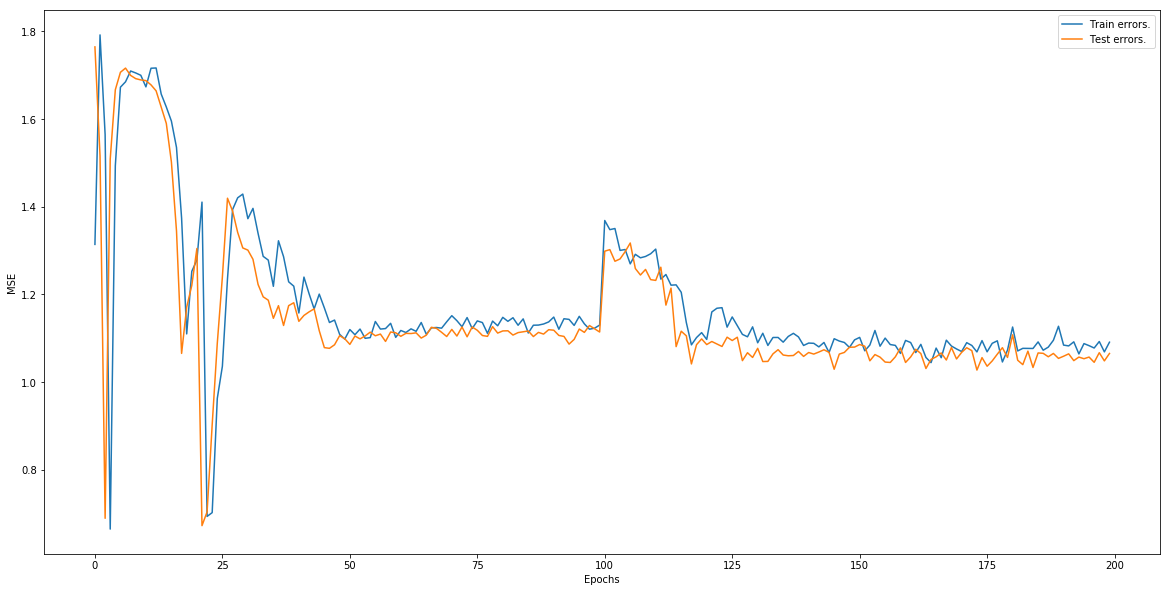

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(DEC.auto_encodable.auto_encoder_model.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(DEC.auto_encodable.auto_encoder_model.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()

In [20]:
f_arr = DEC.auto_encodable.embed_feature_points(observed_arr=observed_arr[:batch_size])
f_arr.shape

(20, 20, 28, 28)

In [21]:
(f_arr[0] - f_arr[1]).mean()

-0.007345644361917614

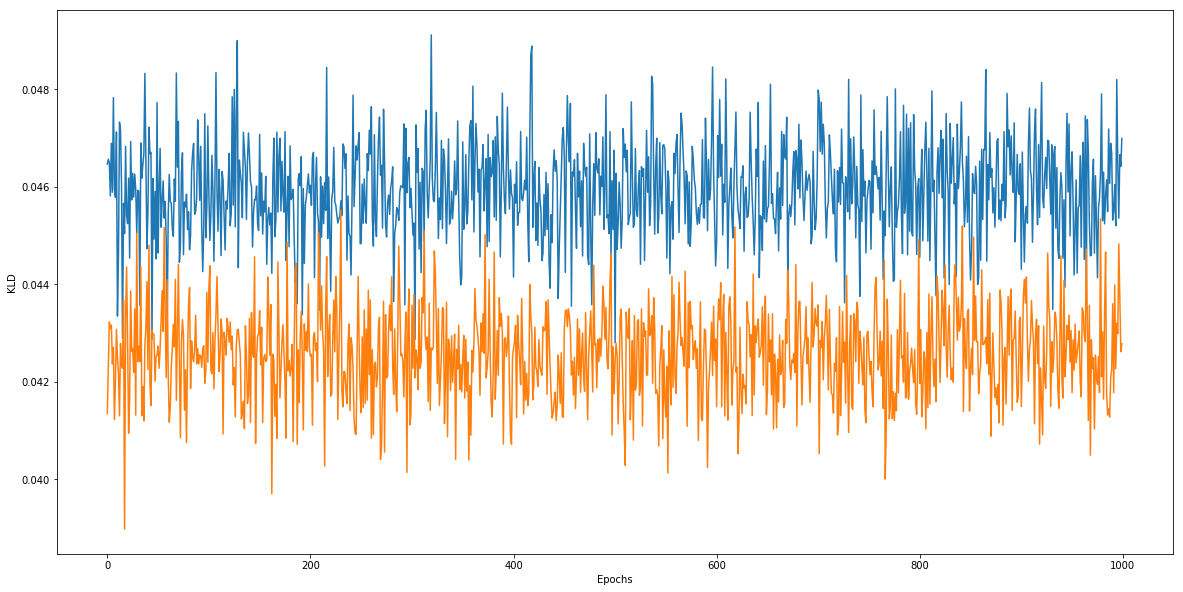

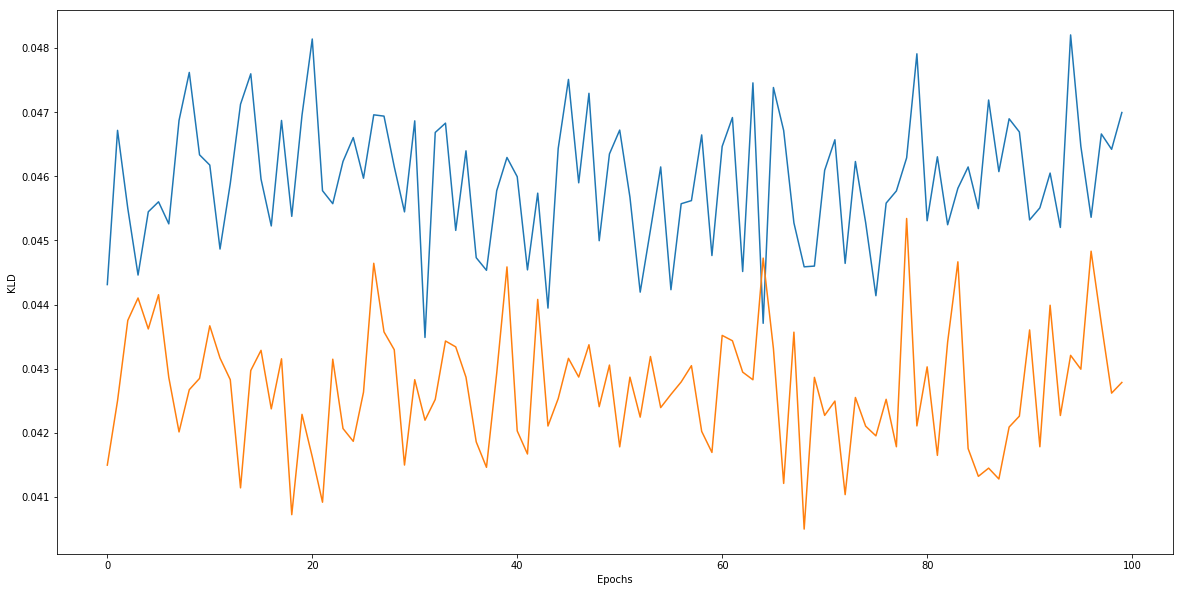

In [22]:
try:
    import matplotlib.pyplot as plt
    %matplotlib inline
    # layer_number corresponds to the index of approximaion_list. 
    # And reconstruct_error_arr is the np.ndarray of reconstruction error rates.
    fig = plt.figure(figsize=(20, 10))
    plt.plot(DEC.loss_arr[:, 0], label="Train Loss.")
    plt.plot(DEC.loss_arr[:, 1], label="Test Loss.")
    plt.xlabel("Epochs")
    plt.ylabel("KLD")
    plt.show();plt.close()
    fig = plt.figure(figsize=(20, 10))
    plt.plot(DEC.loss_arr[-100:, 0], label="Train Loss.")
    plt.plot(DEC.loss_arr[-100:, 1], label="Test Loss.")
    plt.xlabel("Epochs")
    plt.ylabel("KLD")
    plt.show();plt.close()
except:
    pass

(100,)
(100,)


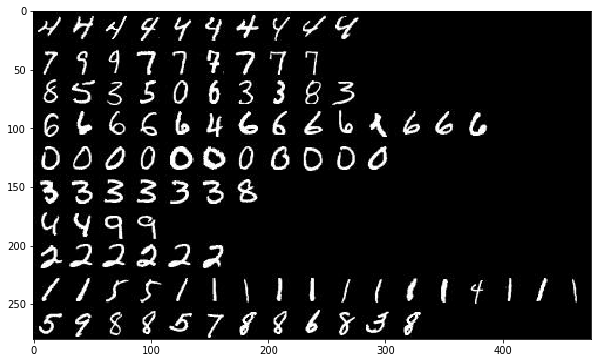

In [38]:
all_label_arr = None
all_key_arr = None
for k in range(5):
    key_arr = np.arange(observed_arr.shape[0])
    np.random.shuffle(key_arr)
    label_arr = DEC.clustering(observed_arr=observed_arr[key_arr][:batch_size])
    
    if all_label_arr is None:
        all_label_arr = label_arr
    else:
        all_label_arr = np.r_[all_label_arr, label_arr]

    if all_key_arr is None:
        all_key_arr = key_arr[:batch_size]
    else:
        all_key_arr = np.r_[all_key_arr, key_arr[:batch_size]]

print(all_key_arr.shape)
print(all_label_arr.shape)

max_n = 0
for i in range(10):
    k = observed_arr[all_key_arr][all_label_arr == i].shape[0]

    if k > max_n:
        max_n = k


from PIL import Image

total_arr = np.zeros((height * 10, width * max_n))

for i in range(10):
    k = 0
    for arr in observed_arr[all_key_arr][all_label_arr == i]:
        arr = arr.reshape((height, width))
        total_arr[height * i:height * (i+1), width * k:width * (k+1)] = arr
        k = k + 1

plt.figure(figsize=(10, 10))
plt.imshow(total_arr, cmap="gray")
plt.show()